[0.00000000e+00 4.97463186e-04 3.91963089e-03 1.30276498e-02
 3.04075676e-02 5.84739939e-02 9.94737601e-02 1.55489581e-01
 2.28443715e-01 3.20101624e-01 4.32075634e-01 5.65828599e-01
 7.22677556e-01 9.03797389e-01 1.11022449e+00 1.34286042e+00
 1.60247557e+00 1.88971281e+00 2.20509116e+00 2.54900948e+00
 2.92175005e+00 3.32348233e+00 3.75426654e+00 4.21405736e+00
 4.70270760e+00 5.21997181e+00 5.76551001e+00 6.33889130e+00
 6.93959752e+00 7.56702696e+00 8.22049795e+00 8.89925259e+00
 9.60246035e+00 1.03292218e+01 1.10785722e+01 1.18494851e+01
 1.26408763e+01 1.34516071e+01 1.42804883e+01 1.51262837e+01
 1.59877136e+01 1.68634589e+01 1.77521645e+01 1.86524426e+01
 1.95628772e+01 2.04820270e+01 2.14084295e+01 2.23406042e+01
 2.32770571e+01 2.42162832e+01 2.51567714e+01 2.60970071e+01
 2.70354765e+01 2.79706701e+01 2.89010861e+01 2.98252347e+01
 3.07416410e+01 3.16488491e+01 3.25454257e+01 3.34299638e+01
 3.43010862e+01 3.51574493e+01 3.59977467e+01 3.68207129e+01
 3.76251269e+01 3.840981

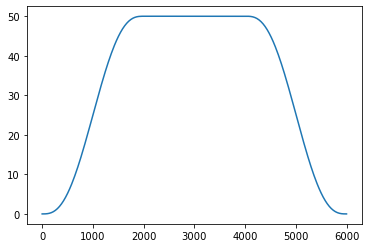

In [57]:
#Minimal Jerk motion profile generator
import numpy as np
import matplotlib.pyplot as plt



v_0 = 0    #rpm
v_f = 50    #RPM
d = 2000    #duration MILLIS
pwm_act = []
steps = 100


t= np.linspace(0,3*d,3*steps)
t_d = np.linspace(0,d,steps)
###v_t =  (1/d) * (v_f-v_0)*(30*(t/d)**2 - 60*(t/d)**3 + 30*(t/d)**4)
pwm_t = v_0 + (v_f-v_0)*(10*(t/d)**3 - 15*(t/d)**4 + 6*(t/d)**5)
pwm_t_d = v_0 + (v_f-v_0)*(10*(t_d/d)**3 - 15*(t_d/d)**4 + 6*(t_d/d)**5)

for i,obj in enumerate(t):
    if(t[i]<=d):
        pwm_act = np.append(pwm_act, pwm_t[i])
    elif(t[i]>d and t[i]<=(2*d)):
        pwm_act = np.append(pwm_act, v_f)
    elif(t[i]> (2*d)):
        pwm_act = np.append(pwm_act, v_f - pwm_t_d[i-200])
        #print(v_f - pwm_t_d[i-200])
    
    #print(" t")

#print(pwm_t_d)
print(pwm_act)
print(len(t))
print(len(pwm_act))
plt.plot(t,pwm_act)



